# DATA ANALYSIS & MISSING VALUE IMPUTATION

In [3]:
#Loading require libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [4]:
#Loading titanic data from seaborn
data = sns.load_dataset('titanic')
#View the top five rows
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [12]:
#Creating numeric value data
data2 = data[['survived', 'pclass', 'age','sibsp','parch', 'fare']]
#View the top five rows
data2.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [13]:
#Checking missing values
data2.isnull().sum()
#age variable have missing value 177 which we will replace by mean

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [15]:
#Replacing missing value in age by mean
data3 = data2.fillna(data2.mean())

In [16]:
#Checking missing values
data3.isnull().sum()
#Missing values has been replace

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

# TRAIN_TEST_SPLIT

In [17]:
#Checking shape of the data3
data3.shape

(891, 6)

In [18]:
#Splitting dat3 into X as independent variable and Y as dependent variable
X = data3.drop(['survived'],axis=1)
Y = data3['survived']

In [19]:
#Checking the shape of the data
print('X shape = ', X.shape)
print('Y shape = ', Y.shape)

X shape =  (891, 5)
Y shape =  (891,)


In [20]:
#Spliting 80% data from X & Y as train and 20% data from X & Y as test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,
                                                   test_size = 0.2,
                                                   random_state = 51)

In [21]:
#Checking the shape of the data
print('X_train shape = ', X_train.shape)
print('X_test shape = ', X_test.shape)
print('Y_train shape = ', Y_train.shape)
print('Y_test shape = ', Y_test.shape)

X_train shape =  (712, 5)
X_test shape =  (179, 5)
Y_train shape =  (712,)
Y_test shape =  (179,)


# STANDARDIZATION

In [22]:
#Calling Standard Scaler Function
std_scale = StandardScaler()

In [23]:
#Applying Standard Scaler Function on X_train data
std_scale.fit(X_train)

StandardScaler()

In [24]:
#Checking the mean of X_train through Standard Scaler Function
std_scale.mean_

array([ 2.30617978, 29.55409121,  0.54775281,  0.39185393, 32.57931784])

In [25]:
#Checking the std dev of X_train through Standard Scaler Function
std_scale.scale_

array([ 0.84405789, 12.99162985,  1.14065352,  0.79647463, 51.32424676])

In [26]:
#Checking stats summary
X_train.describe()

,pclass,age,sibsp,parch,fare
count,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.306180,29.554091,0.547753,0.391854,32.579318
std,0.844651,13.000763,1.141455,0.797035,51.360327
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,1.750000,22.000000,0.000000,0.000000,7.917700
50%,3.000000,29.699118,0.000000,0.000000,14.456250
75%,3.000000,35.000000,1.000000,0.000000,31.068750
max,3.000000,71.000000,8.000000,5.000000,512.329200


In [27]:
#Transforming original value of X_train into standardize value
X_train_std_scale = std_scale.transform(X_train)
#Transforming original value of X_test into standardize value
X_test_std_scale = std_scale.transform(X_test)

In [29]:
#Checking the standardize value of X_train and X_test
X_train_std_scale
#This data are in array forma which needs to convert into data frame

array([[ 0.8220055 , -0.42751304, -0.48020963, -0.49198545, -0.4496767 ],
       [ 0.8220055 ,  1.997125  , -0.48020963, -0.49198545, -0.47792845],
       [ 0.8220055 , -1.42815732, -0.48020963, -0.49198545, -0.26871934],
       ...,
       [ 0.8220055 ,  1.41983023,  0.39648077,  3.27461284,  0.03498701],
       [ 0.8220055 ,  0.01116307,  2.14986159,  0.76354731, -0.13858202],
       [ 0.8220055 , -0.08113618, -0.48020963, -0.49198545, -0.49392089]])

In [30]:
#Checking the standardize value of X_train and X_test
X_test_std_scale

array([[-1.54750023e+00,  8.04049139e-01, -4.80209633e-01,
        -4.91985451e-01, -9.46632078e-02],
       [ 8.22005497e-01,  1.88268048e-01, -4.80209633e-01,
        -4.91985451e-01, -4.77928453e-01],
       [ 8.22005497e-01,  3.43227752e-02, -4.80209633e-01,
        -4.91985451e-01, -4.65994522e-01],
       [-1.54750023e+00,  1.11630672e-02, -4.80209633e-01,
        -4.91985451e-01, -6.34774398e-01],
       [-3.62747365e-01,  3.42213321e-01,  3.96480774e-01,
         7.63547313e-01, -1.54542623e-03],
       [ 8.22005497e-01,  1.88268048e-01, -4.80209633e-01,
        -4.91985451e-01, -4.80932881e-01],
       [-1.54750023e+00,  1.34285759e+00, -4.80209633e-01,
        -4.91985451e-01, -1.36228358e-01],
       [ 8.22005497e-01, -1.04329413e+00, -4.80209633e-01,
        -4.91985451e-01, -4.77928453e-01],
       [-3.62747365e-01,  2.80533768e+00, -4.80209633e-01,
        -4.91985451e-01, -4.30192730e-01],
       [-1.54750023e+00, -1.12026677e+00, -4.80209633e-01,
         7.63547313e-01

In [32]:
#Creating data frame of X_train_std_scale
X_train_std_scale = pd.DataFrame(X_train_std_scale, columns=['pclass', 'age','sibsp','parch', 'fare'])
X_test_std_scale = pd.DataFrame(X_test_std_scale, columns=['pclass', 'age','sibsp','parch', 'fare'])

In [33]:
#Checking the standardized data of X train
X_train_std_scale.head()

,pclass,age,sibsp,parch,fare
0,0.822005,-0.427513,-0.480210,-0.491985,-0.449677
1,0.822005,1.997125,-0.480210,-0.491985,-0.477928
2,0.822005,-1.428157,-0.480210,-0.491985,-0.268719
3,0.822005,-0.889349,-0.480210,-0.491985,-0.483774
4,0.822005,0.011163,6.533314,2.019080,0.720336


In [34]:
#Checking the standardized data of X test
X_test_std_scale.head()

,pclass,age,sibsp,parch,fare
0,-1.547500,0.804049,-0.480210,-0.491985,-0.094663
1,0.822005,0.188268,-0.480210,-0.491985,-0.477928
2,0.822005,0.034323,-0.480210,-0.491985,-0.465995
3,-1.547500,0.011163,-0.480210,-0.491985,-0.634774
4,-0.362747,0.342213,0.396481,0.763547,-0.001545


# NORMALIZATION

In [35]:
#Calling min-max scaler
min_max_scaler = MinMaxScaler()

In [36]:
#Appying min-max scaler on X train data
min_max_scaler.fit(X_train)

MinMaxScaler()

In [37]:
#Transforming original value into normalize value
X_train_min_max = min_max_scaler.transform(X_train)
X_test_min_max = min_max_scaler.transform(X_test)

In [38]:
#Checking data
X_train_min_max

array([[1.        , 0.33408898, 0.        , 0.        , 0.01854277],
       [1.        , 0.78039105, 0.        , 0.        , 0.01571255],
       [1.        , 0.14990082, 0.        , 0.        , 0.03667076],
       ...,
       [1.        , 0.67412865, 0.125     , 0.6       , 0.06709553],
       [1.        , 0.4148359 , 0.375     , 0.2       , 0.04970769],
       [1.        , 0.39784642, 0.        , 0.        , 0.01411046]])

In [39]:
#Checking data
X_test_min_max

array([[0.        , 0.56078209, 0.        , 0.        , 0.0541074 ],
       [1.        , 0.44743553, 0.        , 0.        , 0.01571255],
       [1.        , 0.41909889, 0.        , 0.        , 0.01690807],
       [0.        , 0.4148359 , 0.        , 0.        , 0.        ],
       [0.5       , 0.47577217, 0.125     , 0.2       , 0.06343578],
       [1.        , 0.44743553, 0.        , 0.        , 0.01541158],
       [0.        , 0.65996033, 0.        , 0.        , 0.04994347],
       [1.        , 0.22074242, 0.        , 0.        , 0.01571255],
       [0.5       , 0.9291584 , 0.        , 0.        , 0.02049464],
       [0.        , 0.2065741 , 0.        , 0.2       , 0.41250333],
       [0.5       , 0.43326721, 0.        , 0.        , 0.02049464],
       [0.5       , 0.39076226, 0.        , 0.        , 0.02537431],
       [0.        , 0.63162369, 0.        , 0.        , 0.06929139],
       [1.        , 0.31992066, 0.        , 0.        , 0.01533038],
       [1.        , 0.57495041, 0.

In [40]:
#Creating data frame of X_train
X_train_min_max = pd.DataFrame(X_train_min_max, columns=['pclass', 'age','sibsp','parch', 'fare'])
X_test_min_max = pd.DataFrame(X_test_min_max, columns= ['pclass', 'age','sibsp','parch', 'fare'])

In [41]:
#Checking data
X_train_min_max.head()

,pclass,age,sibsp,parch,fare
0,1.0,0.334089,0.0,0.0,0.018543
1,1.0,0.780391,0.0,0.0,0.015713
2,1.0,0.149901,0.0,0.0,0.036671
3,1.0,0.249079,0.0,0.0,0.015127
4,1.0,0.414836,1.0,0.4,0.135753


In [42]:
#Checking data
X_test_min_max.head()

,pclass,age,sibsp,parch,fare
0,0.0,0.560782,0.000,0.0,0.054107
1,1.0,0.447436,0.000,0.0,0.015713
2,1.0,0.419099,0.000,0.0,0.016908
3,0.0,0.414836,0.000,0.0,0.000000
4,0.5,0.475772,0.125,0.2,0.063436


In [43]:
#Checking the summary of data
X_train_min_max.describe()
#Min have 0 and max have 1

,pclass,age,sibsp,parch,fare
count,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.653090,0.412781,0.068469,0.078371,0.063591
std,0.422326,0.184199,0.142682,0.159407,0.100249
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375000,0.305752,0.000000,0.000000,0.015454
50%,1.000000,0.414836,0.000000,0.000000,0.028217
75%,1.000000,0.489940,0.125000,0.000000,0.060642
max,1.000000,1.000000,1.000000,1.000000,1.000000


# CHECKING NORMAL DISTRIBUTION OF ORIGINAL DATA, STANDARDIZED DATA & NORMALIZED DATA 

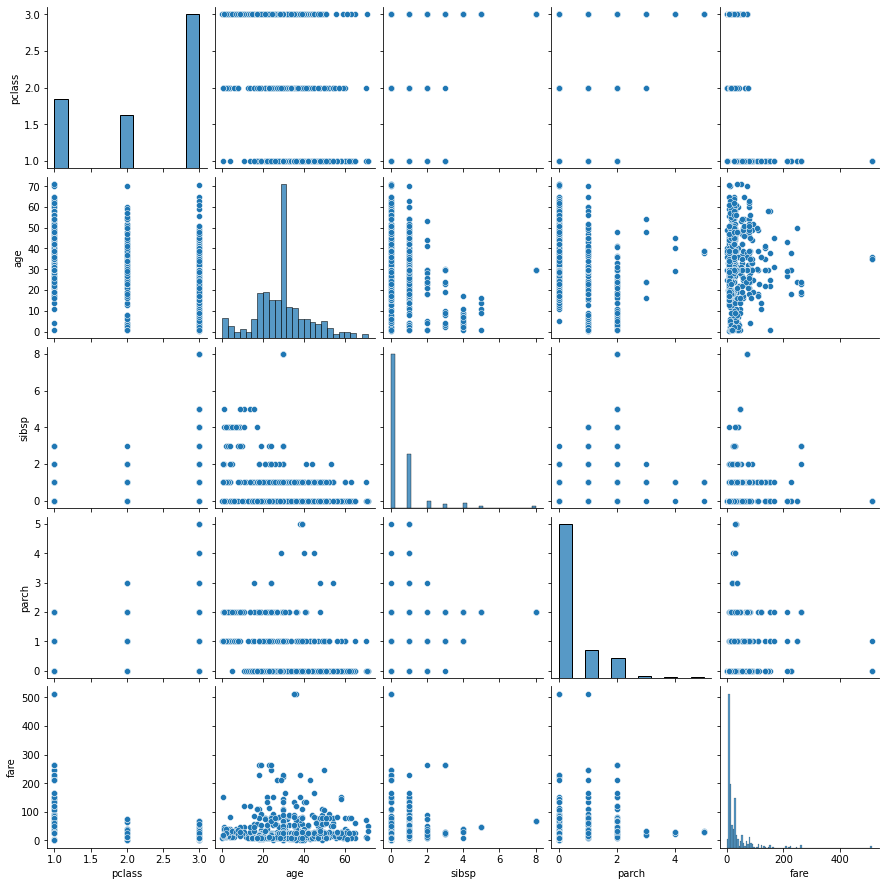

In [52]:
#Creating pair plot of original data X_train
g = sns.pairplot(X_train);

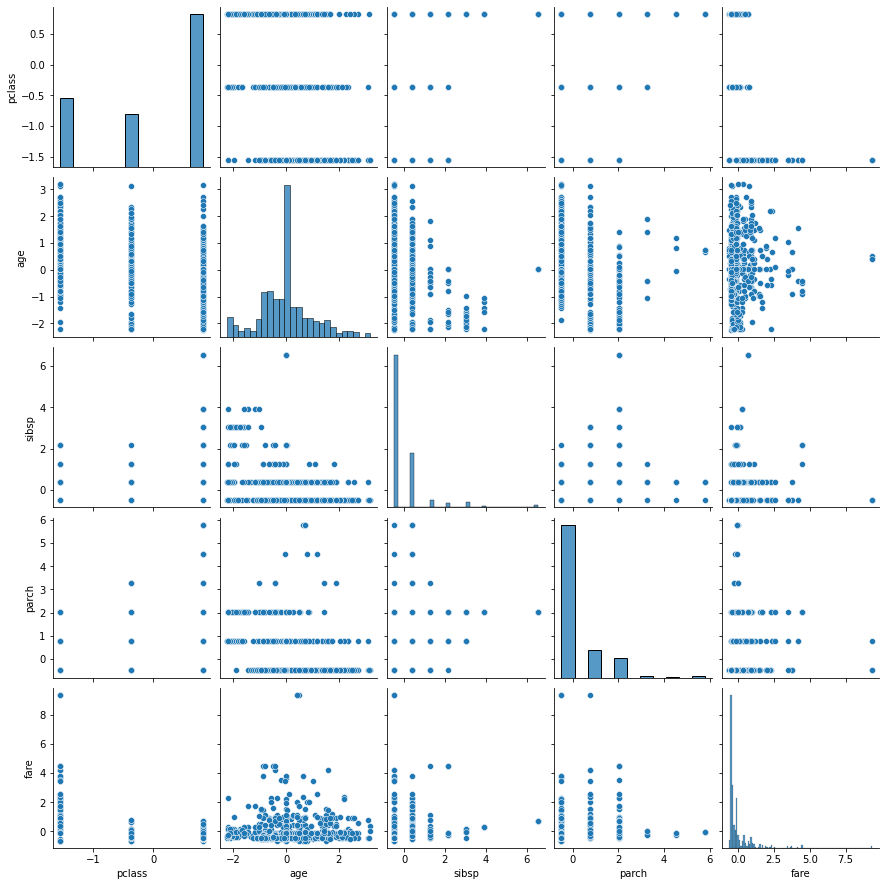

In [49]:
#Creating pair plot of original data X_train_std_scale
sns.pairplot(X_train_std_scale);

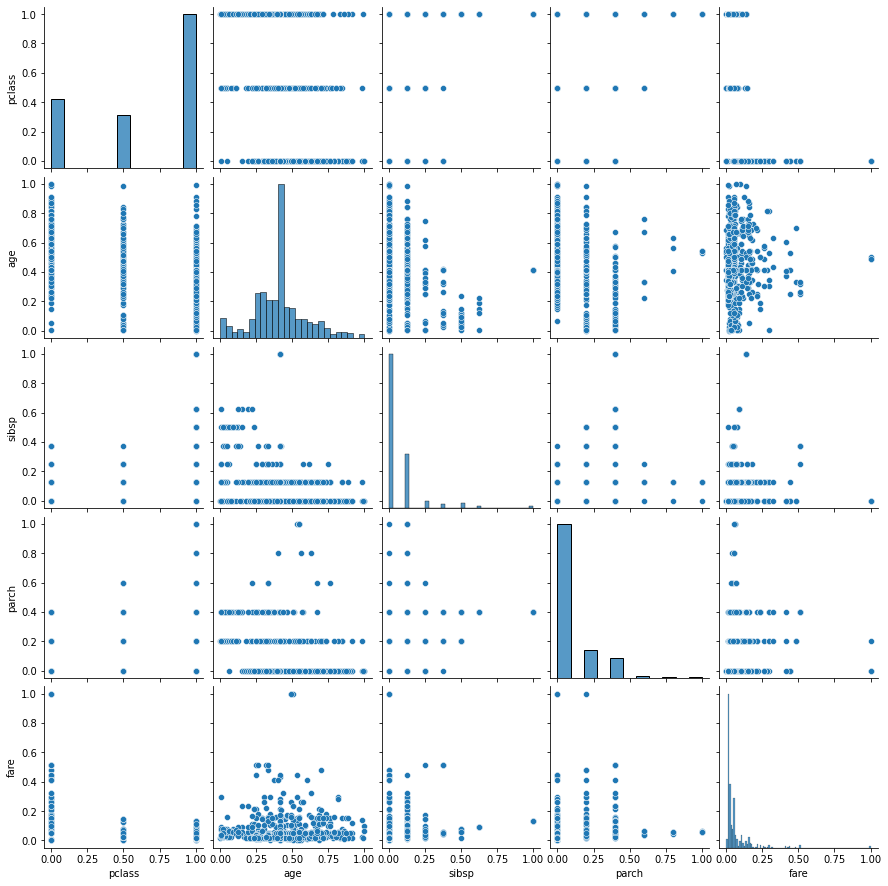

In [50]:
#Creating pair plot of original data X_train_min_max
sns.pairplot(X_train_min_max);